# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import threading
import pygame
import time
import math

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Loading Image

In [26]:
img = cv2.imread("virgoCL1024.jpg")
img.shape

(681, 1024, 3)

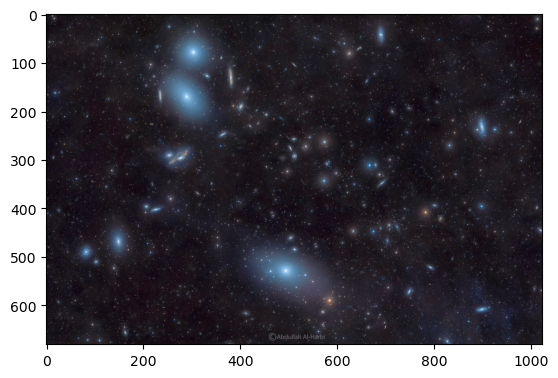

In [27]:
plt.imshow(img, cmap = "viridis")

**Duration of Audio clip**

In [28]:
duration = 120 # in seconds
no_rows = img.shape[0]
duration_each_row = duration/no_rows
duration_each_row

0.1762114537444934

In [29]:
def map_value(values, min_value, max_value, min_result, max_result):
    result = min_result + ((values-min_value)/(max_value-min_value))*(max_result - min_result)
    return result

**Normalization of Image**

In [31]:
norm_img = map_value(img, np.min(img), np.max(img), 0, 1)
print(np.max(norm_img))
print(np.min(norm_img))

1.0
0.0


In [9]:
norm_img[1][:]

array([[0.20784314, 0.19215686, 0.21176471],
       [0.18039216, 0.16470588, 0.18431373],
       [0.1372549 , 0.12156863, 0.14117647],
       ...,
       [0.13333333, 0.10980392, 0.12941176],
       [0.1254902 , 0.09803922, 0.11764706],
       [0.12156863, 0.09411765, 0.11372549]])

# Amplitude for Each Row
 - Mean value of pixel and maximum is value is taken in a row

In [32]:
amp_min, amp_max = 35e2, 127e2

amp_data = []
for i in norm_img:
    amp = round(map_value(np.max(np.mean(i, axis=1)), 0, 1, amp_min, amp_max))
    amp_data.append(amp)

amp_data = np.array(amp_data)
print(amp_data.shape)
# print(amp_data)
print(np.max(amp_data))
print(np.min(amp_data))

(681,)
12556
7192


# Frequency for Each Row
 - Maximum value of RGB is taken as frequncy value

 - ### Piano Note corresoponding frequency

In [11]:
freq_note = {
  "C0": 16.35,
  "C#0": 17.32,
  "D0": 18.35,
  "Eb0": 19.45,
  "E0": 20.6,
  "F0": 21.83,
  "F#0": 23.12,
  "G0": 24.5,
  "Ab0": 25.96,
  "A0": 27.5,
  "Bb0": 29.14,
  "B0": 30.87,
  "C1": 32.7,
  "C#1": 34.65,
  "D1": 36.71,
  "Eb1": 38.89,
  "E1": 41.2,
  "F1": 43.65,
  "F#1": 46.25,
  "G1": 49,
  "Ab1": 51.91,
  "A1": 55,
  "Bb1": 58.27,
  "B1": 61.74,
  "C2": 65.41,
  "C#2": 69.3,
  "D2": 73.42,
  "Eb2": 77.78,
  "E2": 82.41,
  "F2": 87.31,
  "F#2": 92.5,
  "G2": 98,
  "Ab2": 103.83,
  "A2": 110,
  "Bb2": 116.54,
  "B2": 123.47,
  "C3": 130.81,
  "C#3": 138.59,
  "D3": 146.83,
  "Eb3": 155.56,
  "E3": 164.81,
  "F3": 174.61,
  "F#3": 185,
  "G3": 196,
  "Ab3": 207.65,
  "A3": 220,
  "Bb3": 233.08,
  "B3": 246.94,
  "C4": 261.63,
  "C#4": 277.18,
  "D4": 293.66,
  "Eb4": 311.13,
  "E4": 329.63,
  "F4": 349.23,
  "F#4": 369.99,
  "G4": 392,
  "Ab4": 415.3,
  "A4": 440,
  "Bb4": 466.16,
  "B4": 493.88,
  "C5": 523.25,
  "C#5": 554.37,
  "D5": 587.33,
  "Eb5": 622.25,
  "E5": 659.25,
  "F5": 698.46,
  "F#5": 739.99,
  "G5": 783.99,
  "Ab5": 830.61,
  "A5": 880,
  "Bb5": 932.33,
  "B5": 987.77,
  "C6": 1046.5,
  "C#6": 1108.73,
  "D6": 1174.66,
  "Eb6": 1244.51,
  "E6": 1318.51,
  "F6": 1396.91,
  "F#6": 1479.98,
  "G6": 1567.98,
  "Ab6": 1661.22,
  "A6": 1760,
  "Bb6": 1864.66,
  "B6": 1975.53,
  "C7": 2093,
  "C#7": 2217.46,
  "D7": 2349.32,
  "Eb7": 2489.02,
  "E7": 2637.02,
  "F7": 2793.83,
  "F#7": 2959.96,
  "G7": 3135.96,
  "Ab7": 3322.44,
  "A7": 3520,
  "Bb7": 3729.31,
  "B7": 3951.07,
  "C8": 4186.01,
  "C#8": 4434.92,
  "D8": 4698.63,
  "Eb8": 4978.03,
  "E8": 5274.04,
  "F8": 5587.65,
  "F#8": 5919.91,
  "G8": 6271.93,
  "Ab8": 6644.88,
  "A8": 7040,
  "Bb8": 7458.62,
  "B8": 7902.13
}

In [34]:
freq_lst = np.array(list(freq_note.values()))

freq_index = []

for i in norm_img:
    freq = round(map_value(np.max(np.max(i, axis=1)), 0, 1, 1, len(freq_lst)))
    freq_index.append(-freq)

freq_data = []

for i in freq_index:
    freq_data.append(freq_index[i])

freq_data = np.array(freq_data)
# freq_data

# Sound Generation Function

In [13]:
pygame.init()
bits=16
sample_rate = 44100
pygame.mixer.pre_init(sample_rate, bits)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6c7ac13130e7d34a143d729920378bb1902ce74f)  

$\mathcal{where:}$
 - $\mathcal{A\ is\ amplitude}$
 - $\mathcal{f\ is\ frequency}$
 - $\mathcal{w\ is\ angular\ frequency}$
 - $\varphi \mathcal{\ phase}$ 

In [14]:
def sine_x(amp, freq, time):
    return int(round(amp * math.sin(2 * math.pi * freq * time)))

In [15]:
class Tone:
    def sine(amp, freq, duration=1, speaker=None):
        num_samples = int(round(duration * sample_rate))

        sound_buffer = np.zeros((num_samples, 2), dtype = np.int16)
        amplitude = amp #2 ** (bits-1) - 1

        for sample_num in range(num_samples):
            t = sample_num / sample_rate

            sine = sine_x(amplitude, freq, t)

            if speaker == 'r':
                sound_buffer[sample_num][1] = sine
            elif speaker == 'l':
                sound_buffer[sample_num][0] = sine
            else:
                sound_buffer[sample_num][1] = sine
                sound_buffer[sample_num][0] = sine

        sound = pygame.sndarray.make_sound(sound_buffer)
        sound.play(loops=1, maxtime=int(duration * 1000))
        time.sleep(duration)

    @staticmethod
    def create_tone_from_list(amp_list, freq_list, duration=1, speaker=None):
        freq_threads = []
        for amp, freq in zip(amp_list, freq_list):
            freq_thread = threading.Thread(target=Tone.sine, args=[amp ,freq, duration, speaker])
            freq_threads.append(freq_thread)

        for freq_thread in freq_threads:
            freq_thread.start()

        for freq_thread in freq_threads:
            freq_thread.join()

In [ ]:
Tone.create_tone_from_list(amp_data, freq_data, duration=duration_each_row)

# References

 - https://www.youtube.com/watch?v=egW_J4et4HA&t=1s  
 - https://www.youtube.com/watch?v=m_rmwcUREeY&t=31s  
 - https://medium.com/@astromattrusso/sonification-101-how-to-convert-data-into-music-with-python-71a6dd67751c#:~:text=You%20need%20to%20create%20a,duration%20(measured%20in%20beats)